Instal dan *import* *library* Pandas untuk struktur data.

In [44]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd

Karena ukuran dataset besar, *download* dataset dari Google Drive.

In [46]:
%pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [47]:
!rm -rf ./datasets/london_crime_by_lsoa.*
!cd ./datasets \
  && gdown --fuzzy 'https://drive.google.com/file/d/1vqFYDkLxF6Eqvg57EIxk7GH1mUtnagJ7/view?usp=share_link'

Downloading...
From: https://drive.google.com/uc?id=1vqFYDkLxF6Eqvg57EIxk7GH1mUtnagJ7
To: /Users/admin/Documents/Projects/H8_3/datasets/london_crime_by_lsoa.zip
100%|████████████████████████████████████████| 127M/127M [00:49<00:00, 2.58MB/s]


Ekstrak file ZIP dataset.

In [48]:
import zipfile

with zipfile.ZipFile('./datasets/london_crime_by_lsoa.zip', 'r') as zip_ref:
    zip_ref.extractall('./datasets')

!rm -rf ./datasets/london_crime_by_lsoa.zip

*Load* dataset ke dalam Pandas *dataframe*.

In [49]:
df = pd.read_csv('./datasets/london_crime_by_lsoa.csv')

df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Cek jumlah baris dan kolom pada dataset.

In [50]:
df.shape

(13490604, 7)

Diketahui terdapat 7 kolom dan 13.490.604 baris pada dataset.

Cek jumlah *missing values* (data bernilai kosong) pada dataset.

In [51]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Diketahui tidak ada *missing values* pada dataset

Gabungkan kolom **month** dan **year** menjadi kolom **date** agar data dapat dijadikan *time series* berdasarkan bulan di tahun tertentu.

In [52]:
df['date'] = pd.to_datetime(df[['month', 'year']].assign(DAY=1))  # Tambahkan 1 hari sehingga tanggal berada pada tanggal 1 di bulan dan tahun tertentu

df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11-01
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11-01
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2015-05-01
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2016-03-01
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2008-06-01


# *Visualizing Data Using Matplotlib*

Instal dan *import* *library* Matplotlib untuk visualisasi data.

In [53]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Jalankan *command* berikut agar plot Matplotlib dapat muncul dan tersimpan pada *notebook*.

In [55]:
%matplotlib inline

Gunakan *style* **ggplot** untuk tampilan plot Matplotlib

In [56]:
mpl.style.use(['ggplot'])

## *Line Plot*

### Pertanyaan:
Bagaimana perkembangan jumlah kriminalitas di London tiap tahunnya?

Ekstrak data jumlah kriminalitas yang dikelompokkan berdasarkan kolom **date**.

In [57]:
crime_by_year = df.groupby('year')
n_crime_by_year = crime_by_year['value'].sum()

n_crime_by_year

year
2008    738641
2009    717214
2010    715324
2011    724915
2012    737329
2013    686407
2014    680183
2015    711624
2016    736121
Name: value, dtype: int64

Buat *line plot* untuk data tadi.

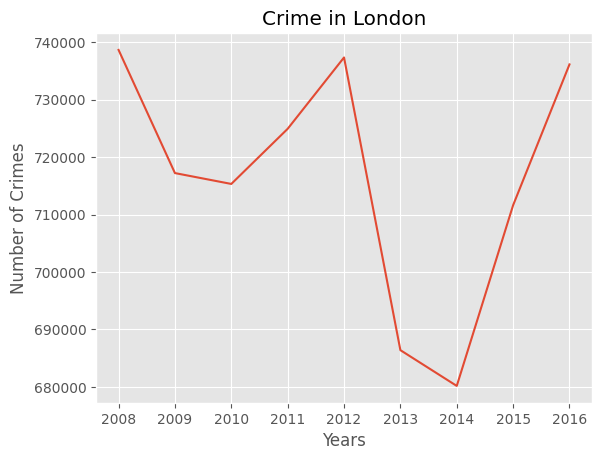

In [58]:
n_crime_by_year.plot(kind='line')

plt.title('Crime in London')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')

plt.show()

### Kesimpulan: 
Kriminalitas di London sempat turun drastis pada tahun 2013 tetapi kembali naik drastis pada tahun 2014-2016.

## *Area Plot*

### Pertanyaan:
Bagaimana perbandingan tren untuk jumlah kriminalitas di 5 wilayah dengan kriminalitas terbanyak di kota London?

Ekstrak data untuk jumlah kriminalitas berdasarkan wilayah (*borough*).

In [59]:
crime_by_borough = df.groupby(['borough', 'date'])            # Kelompokkan data berdasarkan kolom borough dan date

n_crime_by_borough = crime_by_borough['value'].sum()          # Jumlahkan nilai value yang kelompoknya sama
n_crime_by_borough = n_crime_by_borough.unstack(-1)           # Jadikan nilai date sebagai kolom 

n_crime_by_borough.index.name = None

n_crime_by_borough['total'] = n_crime_by_borough.sum(axis=1)  # Buat kolom total dengan menjumlahkan nilai pada setiap kolom

n_crime_by_borough.head()

date,2008-01-01 00:00:00,2008-02-01 00:00:00,2008-03-01 00:00:00,2008-04-01 00:00:00,2008-05-01 00:00:00,2008-06-01 00:00:00,2008-07-01 00:00:00,2008-08-01 00:00:00,2008-09-01 00:00:00,2008-10-01 00:00:00,...,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,total
Barking and Dagenham,1615,1580,1417,1522,1460,1489,1603,1495,1245,1440,...,1339,1555,1449,1534,1346,1363,1323,1316,1278,149447
Barnet,2134,1861,1992,1999,2144,1975,2029,1822,1840,2065,...,2106,2159,2110,2062,2043,2110,2074,2032,1975,212191
Bexley,1346,1296,1342,1240,1280,1189,1259,1279,1182,1292,...,915,998,1048,1093,994,1106,1148,1152,1182,114136
Brent,2136,1895,1946,1797,2026,1917,1986,1864,1883,2115,...,2116,2406,2316,2285,2269,2185,2366,2158,2285,227551
Bromley,2097,1988,1923,1869,2027,1911,2109,1936,1869,2090,...,1530,1708,1607,1780,1537,1595,1758,1755,1860,184349


Ektrak data untuk 5 wilayah dengan total kriminalitas terbanyak.

In [60]:
top_5_boroughs = n_crime_by_borough.sort_values('total', ascending=False).head(5) # Urutkan data berdasarkan nilai total terbersar-terkecil, lalu ambil 5 item saja
top_5_boroughs = top_5_boroughs.drop('total', axis=1)                             # Hapus kolom total
top_5_boroughs = top_5_boroughs.transpose()                                       # Tukar antara baris dengan kolom

top_5_boroughs.index.name = None

top_5_boroughs

,Westminster,Lambeth,Southwark,Camden,Newham
2008-01-01,3957,2740,2990,2610,2876
2008-02-01,3880,2720,2875,2608,2510
2008-03-01,3896,2586,2703,2720,2492
2008-04-01,3725,2448,2713,2532,2290
2008-05-01,3849,2650,2867,2680,2582
...,...,...,...,...,...
2016-08-01,4291,3016,2746,2476,2495
2016-09-01,3773,2854,2792,2425,2456
2016-10-01,4093,2872,2709,2542,2771
2016-11-01,4275,2685,2528,2419,2695


Buat *area plot* untuk data tadi.

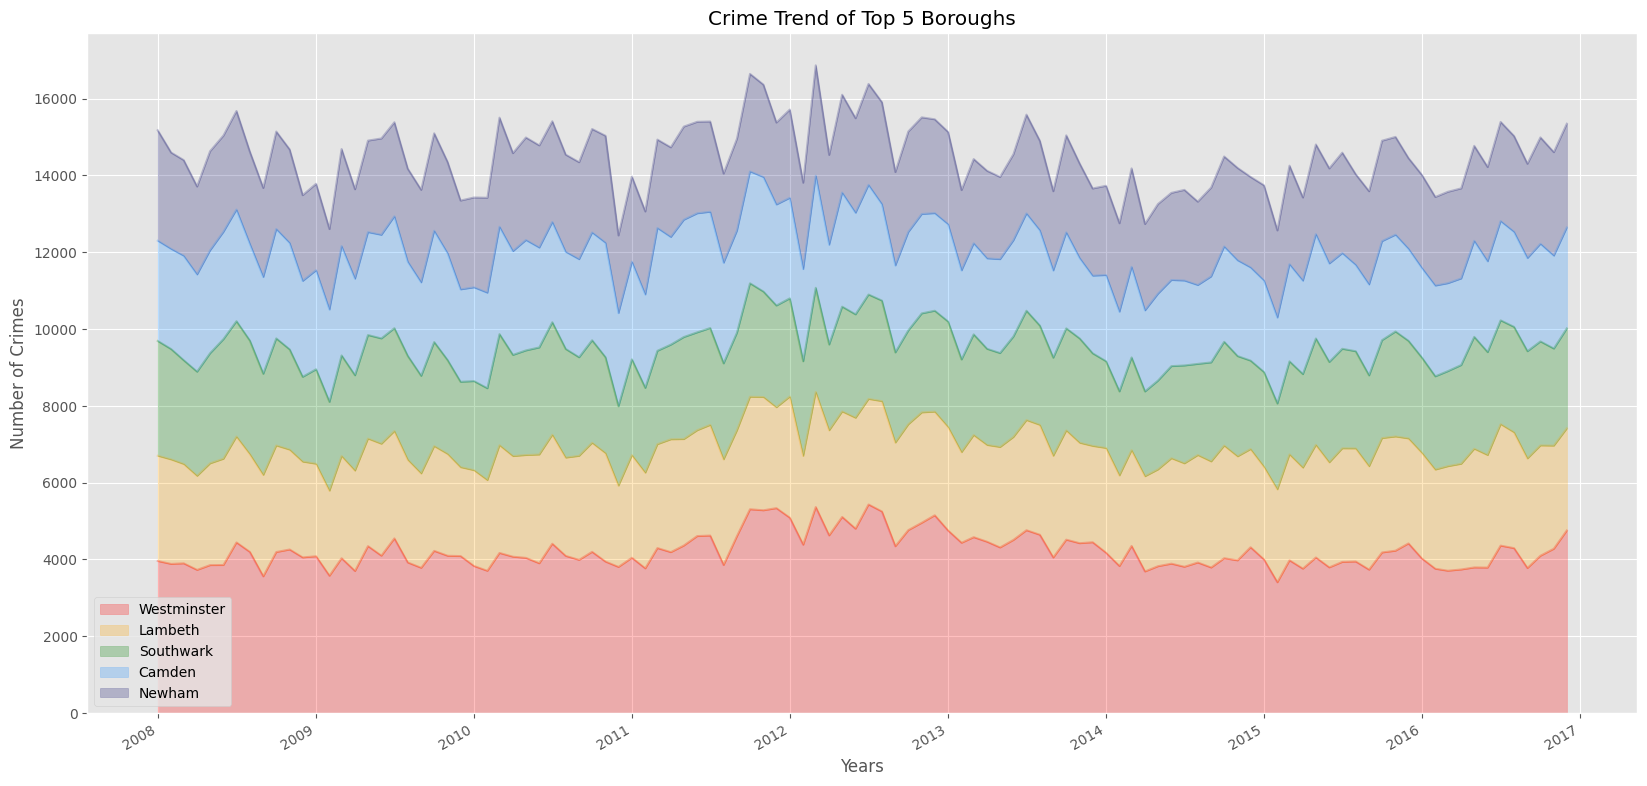

In [61]:
colors = ['red', 'orange', 'green', 'dodgerblue', 'midnightblue', 'fuchsia']

top_5_boroughs.plot(kind='area', 
                    alpha=0.25, 
                    stacked=True, 
                    figsize=(20,10),
                    color=colors)

plt.title('Crime Trend of Top 5 Boroughs')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')

plt.show()

### Kesimpulan:
Lima wilayah dengan kriminalitas terbanyak mengalami tren naik-turun yang hampir sama.

## Histogram

### Pertanyaan:
Bagaimana frekuensi distribusi jumlah kriminalitas di berbagai wilayah kota London pada tahun 2016?

Ekstrak data untuk jumlah kriminalitas berdsarkan wilayah per tahunnya.

In [62]:
crime_by_borough_per_year = df.groupby(['borough', 'year'])                     # Kelompokkan data berdasarkan kolom borough dan date

n_crime_by_borough_per_year = crime_by_borough_per_year['value'].sum()          # Jumlahkan nilai value yang kelompoknya sama
n_crime_by_borough_per_year = n_crime_by_borough_per_year.unstack(-1)           # Jadikan nilai date sebagai kolom 

n_crime_by_borough_per_year.index.name = None

n_crime_by_borough_per_year['total'] = n_crime_by_borough_per_year.sum(axis=1)  # Buat kolom total dengan menjumlahkan nilai pada setiap kolom

n_crime_by_borough_per_year.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


Ekstrak data untuk tahun 2016 dari data tadi.

In [63]:
total_crime_in_2016 = n_crime_by_borough_per_year[2016]

total_crime_in_2016.head()

Barking and Dagenham    16741
Barnet                  24684
Bexley                  12840
Brent                   26693
Bromley                 20164
Name: 2016, dtype: int64

Dapatkan jumlah wilayah pada kolom **borough**.

In [64]:
n_boroughs = len(total_crime_in_2016)

n_boroughs

33

Buat histogram untuk data tadi.

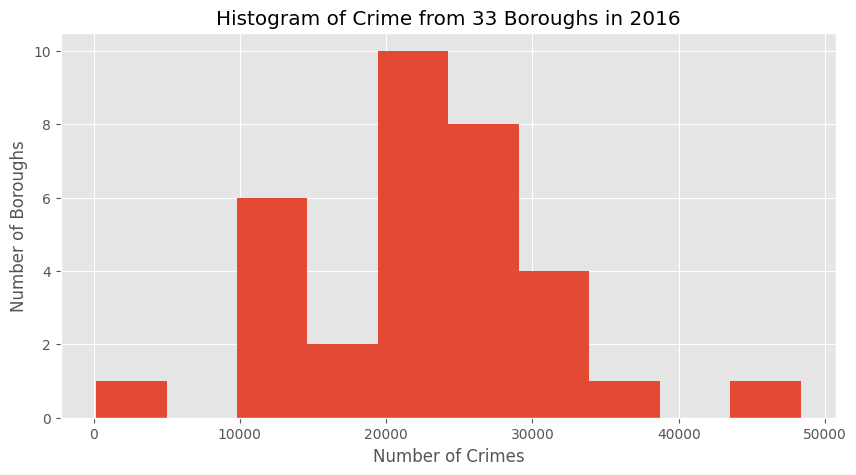

In [65]:
# count, bin_edges = np.histogram(total_crime_in_2016)

total_crime_in_2016.plot(kind='hist', figsize=(10,5))

plt.title('Histogram of Crime from {n_boroughs} Boroughs in 2016'.format(n_boroughs=n_boroughs))
plt.ylabel('Number of Boroughs')
plt.xlabel('Number of Crimes')

plt.show()

### Kesimpulan:
Pada tahun 2016, 20.000-30.000 kriminalitas sering terjadi di lebih dari setengah wilayah London (18 dari 33).

## Bar Chart

### Pertanyaan:
Sepuluh wilayah apa saja yang memiliki total kriminalitas terbanyak di kota London pada tahun 2018-2016?

Ekstrak data untuk 10 wilayah dengan total kriminalitas terbanyak.

In [66]:
total_crime_by_borough = n_crime_by_borough_per_year['total']
top_10_boroughs = total_crime_by_borough.sort_values().tail(10) # Urutkan data berdasarkan nilai total terbersar-terkecil, lalu ambil 10 item saja

top_10_boroughs

Brent            227551
Tower Hamlets    228613
Islington        230286
Ealing           251562
Croydon          260294
Newham           262024
Camden           275147
Southwark        278809
Lambeth          292178
Westminster      455028
Name: total, dtype: int64

Dapatkan tahun terkecil dan terbesar pada kolom **year**.

In [67]:
min_year = df['year'].min()
max_year = df['year'].max()

min_year, max_year

(2008, 2016)

Buat *horizontal bar plot* untuk data tadi.

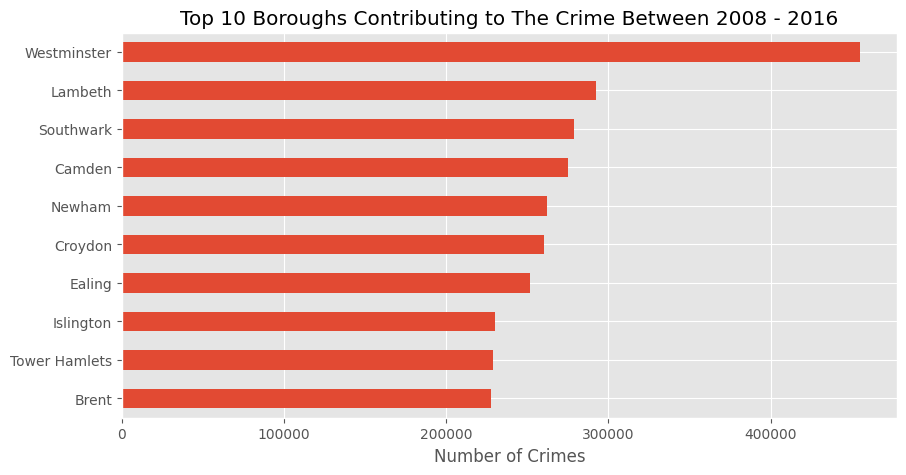

In [68]:
top_10_boroughs.plot(kind='barh', figsize=(10,5))

plt.xlabel('Number of Crimes')
plt.title('Top 10 Boroughs Contributing to The Crime Between {min_year} - {max_year}'.format(min_year=min_year, max_year=max_year))

plt.show()

### Kesimpulan:
Sepuluh wilayah London dengan kriminalitas terbanyak berturut-turut adalah Westminster, Lambeth, Southwark, Camden, Newham, Croydon, Ealing, Islington, Tower Hamlets, dan Brent. Untuk wilayah Westminster sendiri, jumlah kriminalitasnya memiliki selisih yang jauh berbeda dari wilayah lainnya.

## *Pie Chart*

### Pertanyaan:
Bagaimana persentase jumlah kriminalitas di kota London dikelompokkan berdasarkan kategori utama pada tahun 2008-20016?

Ekstrak data untuk jumlah kriminalitas berdasarkan kategori utama (*major category*).

In [69]:
crime_by_major_cat = df.groupby('major_category')         # Kelompokkan data berdasarkan kolom major_category
n_crime_by_major_cat = crime_by_major_cat['value'].sum()  # Jumlahkan nilai value yang kelompoknya sama
n_crime_by_major_cat.name = 'Total'

n_crime_by_major_cat

major_category
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Fraud or Forgery                  5325
Other Notifiable Offences       106349
Robbery                         258873
Sexual Offences                   1273
Theft and Handling             2661861
Violence Against the Person    1558081
Name: Total, dtype: int64

Buat *pie chart* untuk data tadi.

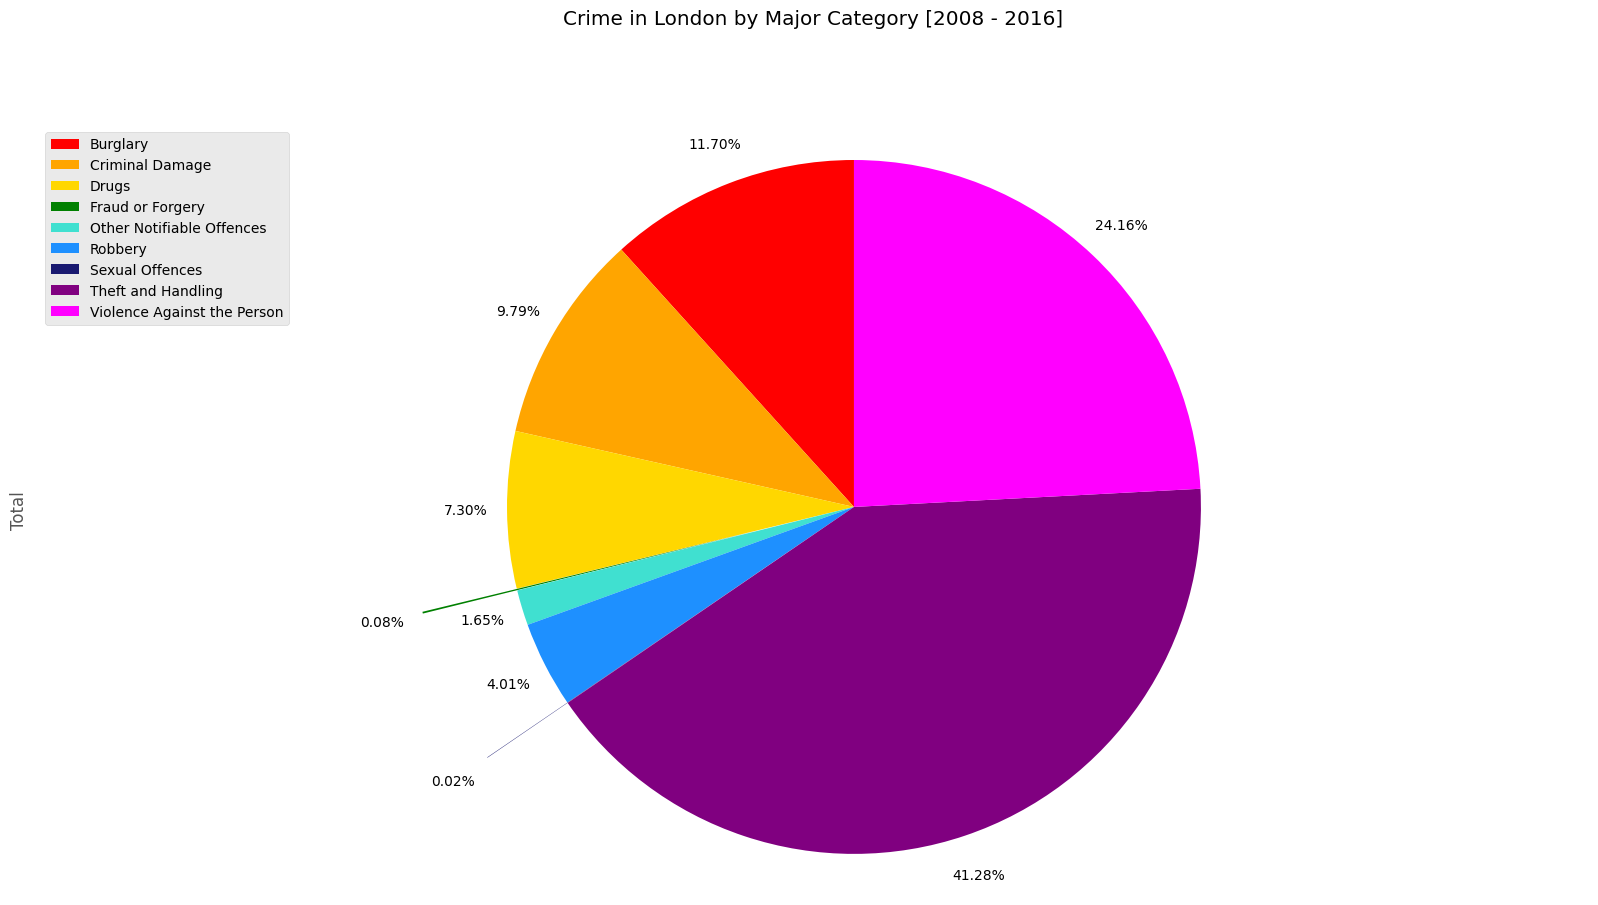

In [70]:
colors = ['red', 'orange', 'gold', 'green', 'turquoise', 'dodgerblue', 'midnightblue', 'purple', 'fuchsia']

# Tonjolkan data dengan nilai lebih kecil dari Q1 agar dapat terlihat
explode = [0.28 if i < n_crime_by_major_cat.quantile(0.25) else 0 for i in n_crime_by_major_cat]

n_crime_by_major_cat.plot(kind='pie', 
                          figsize=(20,10), 
                          autopct='%1.2f%%',  # Tampilkan teks persentase berupa bilangan desimal dengan 2 angka di belakang koma
                          startangle=90,
                          labels=None,
                          pctdistance=1.12,   # Beri jarak untuk teks persentase agar tidak terlalu berdekatan
                          colors=colors,
                          explode=explode)    # Tonjolkan beberapa data

plt.title('Crime in London by Major Category [{min_year} - {max_year}]'.format(min_year=min_year, max_year=max_year),
          y=1.12)
plt.axis('equal')
plt.legend(labels=n_crime_by_major_cat.index, loc='upper left')

plt.show()

### Kesimpulan:
Kriminalitas dengan kategori utama "Theft and Handling" merupakan kriminalitas dengan persentase paling besar terjadi di wilayah London. Sedangkan persentase yang paling kecil adalah kriminalitas dengan kategori utama "Sexual Offences".

## *Box Plot*

### Pertanyaan:
Bagaimana distribusi angka dari 5 wilayah dengan kriminalitas terbanyak di kota London pada tahun 2008 - 2016?

Lihat distribusi angka dari data 5 wilayah dengan kriminalitas terbanyak.

In [71]:
top_5_boroughs.describe()

,Westminster,Lambeth,Southwark,Camden,Newham
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,4213.222222,2705.351852,2581.564815,2547.657407,2426.148148
std,446.103197,190.987709,200.705358,237.928606,172.797100
min,3403.000000,2116.000000,2068.000000,2021.000000,2022.000000
25%,3873.250000,2614.000000,2446.500000,2404.000000,2318.750000
50%,4093.000000,2723.500000,2583.000000,2525.000000,2415.500000
75%,4433.250000,2833.000000,2711.500000,2679.250000,2538.250000
max,5428.000000,3161.000000,3116.000000,3196.000000,2876.000000


Buat *box plot* untuk distribusi angka dari data 5 wilayah dengan kriminalitas terbanyak.

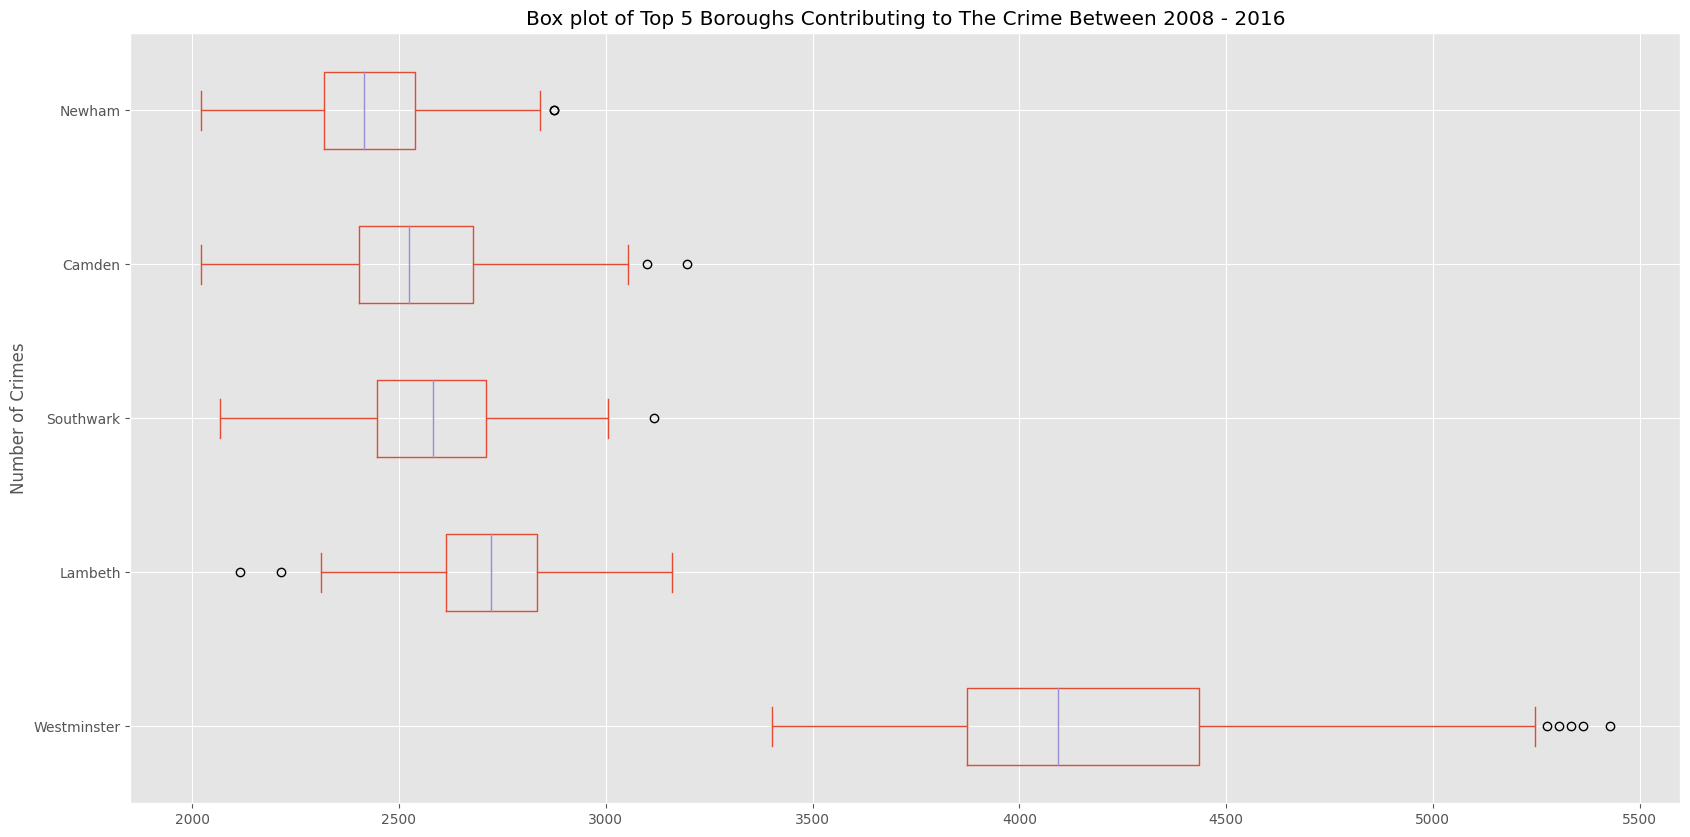

In [72]:
top_5_boroughs.plot(kind='box', figsize=(20,10), vert=False)

plt.title('Box plot of Top 5 Boroughs Contributing to The Crime Between {min_year} - {max_year}'.format(min_year=min_year, max_year=max_year))
plt.ylabel('Number of Crimes')

plt.show()

### Kesimpulan:
Dari kelima wilayah dengan kriminalitas terbanyak di London, wilayah Westminster memiliki distribusi jumlah kriminalitas dengan range terlebar. Sedangkan 4 wilayah yang lain memiliki distribusi jumlah kriminalitas dengan range yang hampir sama satu sama lain.

## *Scatter Plot*

Bagaimana hubungan antara jumlah kriminalitas dengan kategori utama "Drugs" di kota London dengan seiringnya waktu yang berjalan?

Ekstrak data untuk julmah kriminalitas dengan kategori utamanya adalah narkotika (*drugs*) per bulannya.

In [73]:
drug_crime = df[df['major_category'] == 'Drugs']

drug_crime_per_date = drug_crime.groupby('date')            # Kelompokkan data berdasarkan kolom borough dan date

n_drug_crime_per_date = drug_crime_per_date['value'].sum()  # Jumlahkan nilai value yang kelompoknya sama
n_drug_crime_per_date = n_drug_crime_per_date.reset_index() # Reset index agar index date dijadikan kolom date

n_drug_crime_per_date

,date,value
0,2008-01-01,5230
1,2008-02-01,6071
2,2008-03-01,5769
3,2008-04-01,5158
4,2008-05-01,5868
...,...,...
103,2016-08-01,3442
104,2016-09-01,3091
105,2016-10-01,3204
106,2016-11-01,2894


Buat *scatter plot* untuk data tadi.

<AxesSubplot:xlabel='date', ylabel='value'>

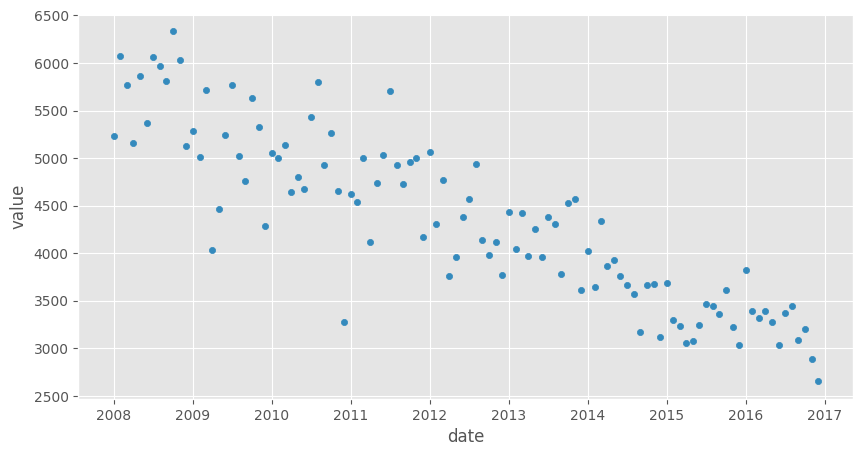

In [74]:
n_drug_crime_per_date.plot(kind='scatter', x='date', y='value', figsize=(10,5))

### Kesimpulan:
Kriminalitas dengan kategori utama "Drugs" mengalami tren menurun seiring waktu dari tahun 2008 awal sampai dengan 2016 akhir.

## *Word Cloud*

### Pertanyaan:
Wilayah kota apa saja yang mayoritas memiliki kriminalitas terbanyak di kota London?

Instal dan *import* _library_ wordcloud untuk membuat _word cloud_ dari teks.

In [75]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [76]:
from wordcloud import WordCloud

Cek data yang akan digunakan untuk membuat *word cloud*.

In [77]:
n_crime_by_borough.head()

date,2008-01-01 00:00:00,2008-02-01 00:00:00,2008-03-01 00:00:00,2008-04-01 00:00:00,2008-05-01 00:00:00,2008-06-01 00:00:00,2008-07-01 00:00:00,2008-08-01 00:00:00,2008-09-01 00:00:00,2008-10-01 00:00:00,...,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,total
Barking and Dagenham,1615,1580,1417,1522,1460,1489,1603,1495,1245,1440,...,1339,1555,1449,1534,1346,1363,1323,1316,1278,149447
Barnet,2134,1861,1992,1999,2144,1975,2029,1822,1840,2065,...,2106,2159,2110,2062,2043,2110,2074,2032,1975,212191
Bexley,1346,1296,1342,1240,1280,1189,1259,1279,1182,1292,...,915,998,1048,1093,994,1106,1148,1152,1182,114136
Brent,2136,1895,1946,1797,2026,1917,1986,1864,1883,2115,...,2116,2406,2316,2285,2269,2185,2366,2158,2285,227551
Bromley,2097,1988,1923,1869,2027,1911,2109,1936,1869,2090,...,1530,1708,1607,1780,1537,1595,1758,1755,1860,184349


Dapatkan data total jumlah kriminalitas.

In [78]:
total_crime = n_crime_by_borough['total'].sum()

total_crime

6447758

Buat teks berisi nama-nama wilayah dengan jumlah sesuai persentase terhadap total kriminalitas.

In [79]:
import random

max_words = 100
text = '' 

# Tambahkan kata dengan jumlah sesuai persentase terhadap total kriminalitas
for borough in n_crime_by_borough.index.values:
  _borough = borough.replace(' ', '_')

  n = int(n_crime_by_borough.loc[borough, 'total'] / float(total_crime) * max_words)
  text = text + ((_borough + ' ') * n)

# Acak kata
words = text.split(' ')
random.shuffle(words)
text =' '.join(words)

text

'Ealing Richmond_upon_Thames Newham Hillingdon Hammersmith_and_Fulham Hillingdon Brent Waltham_Forest Islington Southwark Barnet Southwark Lambeth Brent Lambeth Westminster Hackney Wandsworth Barnet Wandsworth  Havering Ealing Croydon Newham Westminster Hackney Croydon Enfield Greenwich Harrow Kensington_and_Chelsea Hounslow Islington Haringey Camden Waltham_Forest Bromley Hounslow Barnet Bexley Southwark Redbridge Westminster Westminster Ealing Bromley Tower_Hamlets Tower_Hamlets Newham Newham Haringey Enfield Greenwich Lewisham Westminster Croydon Hammersmith_and_Fulham Brent Tower_Hamlets Kingston_upon_Thames Westminster Kensington_and_Chelsea Lambeth Hillingdon Croydon Havering Hackney Redbridge Haringey Camden Sutton Barking_and_Dagenham Waltham_Forest Camden Merton Wandsworth Lambeth Southwark Enfield Camden Lewisham Westminster Barking_and_Dagenham Islington Lewisham'

Buat *word cloud* dari teks tadi.

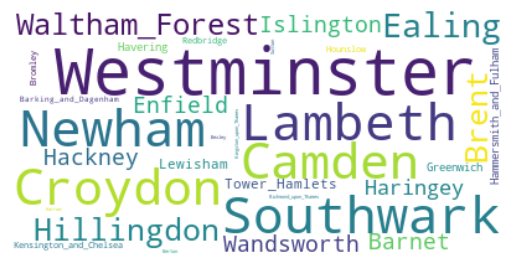

In [80]:
wordcloud = WordCloud(background_color='white').generate(text)
fig = plt.figure()

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Kesimpulan:
Kriminalitas di wilayah kota London mayoritas banyak terjadi di Westminster, Lambeth, Camden, dst.

## *Folium Map*

### Pertanyaan:
Bagaimana visualisasi data jumlah kriminalitas tiap wilayah kota London pada peta? 

Instal _library_ folium untuk memvisualisasikan data pada peta.

In [81]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


*Import* *library* Folium untuk mulai menggunakannya.

In [82]:
import folium

*Download* file GeoJSON yang mendefinisikan area/batas wilayah kota London.

In [83]:
!cd ./datasets \
  && curl https://skgrange.github.io/www/data/london_boroughs.json --output london_boroughs.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2547k  100 2547k    0     0  2948k      0 --:--:-- --:--:-- --:--:-- 3125k


Dapatkan data jumlah kriminalitas berdasarkan wilayah dan ubah strukturnya untuk divisualisasikan pada peta.

In [84]:
london_boroughs_data = n_crime_by_borough.reset_index()
london_boroughs_data.rename(columns={'index': 'Borough', 'total': 'Total'}, inplace=True)
london_boroughs_data.columns.name = None

london_boroughs_data.head()

,Borough,2008-01-01 00:00:00,2008-02-01 00:00:00,2008-03-01 00:00:00,2008-04-01 00:00:00,2008-05-01 00:00:00,2008-06-01 00:00:00,2008-07-01 00:00:00,2008-08-01 00:00:00,2008-09-01 00:00:00,...,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,Total
0,Barking and Dagenham,1615,1580,1417,1522,1460,1489,1603,1495,1245,...,1339,1555,1449,1534,1346,1363,1323,1316,1278,149447
1,Barnet,2134,1861,1992,1999,2144,1975,2029,1822,1840,...,2106,2159,2110,2062,2043,2110,2074,2032,1975,212191
2,Bexley,1346,1296,1342,1240,1280,1189,1259,1279,1182,...,915,998,1048,1093,994,1106,1148,1152,1182,114136
3,Brent,2136,1895,1946,1797,2026,1917,1986,1864,1883,...,2116,2406,2316,2285,2269,2185,2366,2158,2285,227551
4,Bromley,2097,1988,1923,1869,2027,1911,2109,1936,1869,...,1530,1708,1607,1780,1537,1595,1758,1755,1860,184349


Visualisasikan data tadi pada peta.

In [85]:
london_boroughs_geo_data = './datasets/london_boroughs.json'
london_location = (51.509865, -0.118092)

london_boroughs_map = folium.Map(location=london_location, zoom_start=10.4)

london_boroughs_map.choropleth(geo_data=london_boroughs_geo_data,
                               data=london_boroughs_data,
                               columns=['Borough', 'Total'],
                               key_on='feature.properties.name',
                               fill_color='YlOrRd', #Yellow, Orange, Red
                               fill_opacity=0.6,
                               line_opacity=0.2,
                               legend_name='Crime in London')

london_boroughs_map

/usr/local/anaconda3/envs/py3.7/lib/python3.7/site-packages/folium/folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### Kesimpulan:
Wilayah yang berada di pusat kota London lebih banyak terjadi kriminalitas dibanding wilayah yang berada di pinggir kota.

## Analisis Keseluruhan:

Kriminalitas di London sempat turun drastis pada tahun 2013 tetapi kembali naik drastis pada tahun 2014 - 2016. Tercatat pada tahun 2016, 20.000-30.000 kriminalitas sering terjadi di lebih dari setengah wilayah London. Sepanjang tahun 2013-2016, Kriminalitas yang terjadi lebih banyak muncul di wilayah pusat kota dibandingkan dengan wilayah pinggir kota London. 

Adapun sepuluh wilayah dengan kriminalitas tertinggi di London berturut-turut adalah Westminster, Lambeth, Southwark, Camden, Newham, Croydon, Ealing, Islington, Tower Hamlets, dan Brent. Dan di antara lima wilayah teratasnya, wilayah Westminster memiliki jumlah kriminalitas dengan range terlebar dan selisih paling jauh dari empat lainnya. Meskipun begitu, kelimanya mengalami tren naik-turun yang hampir sama untuk jumlah kriminalitasnya. 

Kriminalitas dengan kategori utama "Theft and Handling" merupakan kriminalitas yang paling banyak terjadi di wilayah London. Sedangkan yang jarang terjadi adalah kriminalitas dengan kategori utama "Sexual Offences". Di sisi lain, kriminalitas dengan kategori utama "Drugs" mengalami tren menurun seiring waktu dari tahun 2008 awal sampai dengan 2016 akhir.